# Trump's tweets related to China VS Chinese Equities Sentiment

#### based on past reactions towards Trump's tweet, can I predict whether Chinese equities will react favorably towards his latest tweet?

### Attempt 1: two classes of sentiment -- "positive"/"negative"

In [5]:
import pandas as pd
import numpy as np

In [6]:
dateparse = lambda x: pd.datetime.strptime(x, '%m-%d-%Y %H:%M:%S')
    

trump_df = pd.read_csv(r"D:\Documents\Docs_oldnew\trump_tweet_api\Trump_tweets_China_since2016.txt", parse_dates=['created_at'], date_parser=dateparse)
trump_df.head()

C:\Users\gen80\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,text,created_at
0,.@FoxNews “Trump wins major victories in Chin...,2019-12-17 14:48:50
1,....energy independence manufacturing resilien...,2019-12-16 05:28:18
2,....energy independence manufacturing resilien...,2019-12-16 05:05:08
3,Chuck Schumer sat for years during the Obama A...,2019-12-14 19:09:26
4,We have agreed to a very large Phase One Deal ...,2019-12-13 15:25:47


In [7]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   text        365 non-null    object        
 1   created_at  365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.8+ KB


In [8]:
len(trump_df)

365

In [9]:
nonrepeat_text =trump_df[['text']].drop_duplicates()

In [10]:
nonrepeat_text.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            355, 356, 357, 358, 359, 360, 361, 362, 363, 364],
           dtype='int64', length=358)

In [11]:
nonrepeat_text.head()

,text
0,.@FoxNews “Trump wins major victories in Chin...
1,....energy independence manufacturing resilien...
2,....energy independence manufacturing resilien...
3,Chuck Schumer sat for years during the Obama A...
4,We have agreed to a very large Phase One Deal ...


In [12]:
nonrepeat_datetime = trump_df['created_at'][nonrepeat_text.index]

#account for timezone difference btw NY and HK
time_zoneadjusted =nonrepeat_datetime + pd.DateOffset(hours= +13)

In [13]:
#object type of datetime column
type(nonrepeat_datetime[0])


pandas._libs.tslibs.timestamps.Timestamp

In [14]:
nonrepeat_text['record_time'] = time_zoneadjusted
nonrepeat_text.head()
#neccessary to make it into index?? so as to do nested index filtering?

,text,record_time
0,.@FoxNews “Trump wins major victories in Chin...,2019-12-18 03:48:50
1,....energy independence manufacturing resilien...,2019-12-16 18:28:18
2,....energy independence manufacturing resilien...,2019-12-16 18:05:08
3,Chuck Schumer sat for years during the Obama A...,2019-12-15 08:09:26
4,We have agreed to a very large Phase One Deal ...,2019-12-14 04:25:47


In [15]:
#try extracting the hour
#nonrepeat_text['record_time'].dt.hour

#? use df.between_time('00:00', '6:00') ## this is filtering on a certain criteria

In [16]:
## to-do:
# split into a column in date, another in time

In [17]:
#sort the datetime index in natural order

adjusted_df = nonrepeat_text.set_index('record_time').sort_index()
adjusted_df.head()

,text
record_time,
2016-05-09 09:15:20,Crooked Hillary just can't close the deal with...
2016-05-14 14:03:02,If Crooked Hillary Clinton can't close the dea...
2016-05-18 00:37:03,The pathetic new hit ad against me misrepresen...
2016-05-18 00:46:22,Crooked Hillary Clinton put out an ad where I ...
2016-05-20 22:47:09,Crooked Hillary has zero imagination and even ...


In [18]:
adjusted_df =adjusted_df.reset_index()

In [19]:
# get the date component from datetime object
adjusted_df['record_time'][0].date()
#get the time component 
adjusted_df['record_time'][0].time()

datetime.time(9, 15, 20)

In [20]:
#adjusted_df['year_ind'] =adjusted_df.index.year
#adjusted_df['mon_ind'] =adjusted_df.index.month
#adjusted_df['day_ind'] =adjusted_df.index.day
#adjusted_df['day_ind'].head()
#adjusted_df.to_datetime([adjusted_df['year_ind'], adjusted_df['mon_ind'], adjusted_df['day_ind']])

#pd.to_datetime(adjusted_df.index, format='%Y%m%d', errors='ignore')

#t.apply(lambda x: x.date()) 

adjusted_df['date']=adjusted_df['record_time'].apply(lambda x: x.date())
adjusted_df['time']=adjusted_df['record_time'].apply(lambda x: x.time())
adjusted_df['day_of_week'] = adjusted_df['record_time'].apply(lambda x:x.day_name())

In [21]:
adjusted_df.head()

,record_time,text,date,time,day_of_week
0,2016-05-09 09:15:20,Crooked Hillary just can't close the deal with...,2016-05-09,09:15:20,Monday
1,2016-05-14 14:03:02,If Crooked Hillary Clinton can't close the dea...,2016-05-14,14:03:02,Saturday
2,2016-05-18 00:37:03,The pathetic new hit ad against me misrepresen...,2016-05-18,00:37:03,Wednesday
3,2016-05-18 00:46:22,Crooked Hillary Clinton put out an ad where I ...,2016-05-18,00:46:22,Wednesday
4,2016-05-20 22:47:09,Crooked Hillary has zero imagination and even ...,2016-05-20,22:47:09,Friday


In [22]:
adjusted_df = adjusted_df.drop(columns = ['record_time']).set_index('date')

In [23]:
adjusted_df = adjusted_df[['day_of_week','time','text']]
adjusted_df.head()

,day_of_week,time,text
date,,,
2016-05-09,Monday,09:15:20,Crooked Hillary just can't close the deal with...
2016-05-14,Saturday,14:03:02,If Crooked Hillary Clinton can't close the dea...
2016-05-18,Wednesday,00:37:03,The pathetic new hit ad against me misrepresen...
2016-05-18,Wednesday,00:46:22,Crooked Hillary Clinton put out an ad where I ...
2016-05-20,Friday,22:47:09,Crooked Hillary has zero imagination and even ...


In [24]:
HSCE_df =pd.read_csv(r'D:\Documents\Docs_oldnew\trump_tweet_api\HSCE_since2016May.csv', index_col = 0, parse_dates = True)
HSCE_df.head()

,open,high,low,close,volume
date,,,,,
2016-05-09,20279.90039,20303.18945,20125.77930,20156.81055,1323285400
2016-05-10,19962.42969,20294.46094,19962.42969,20242.67969,1446925800
2016-05-11,20347.75977,20347.75977,20008.91992,20055.28906,1337926500
2016-05-12,20100.50000,20100.50000,19863.61914,19915.46094,1150409200
2016-05-13,19843.49023,19881.91016,19594.60938,19719.28906,1758498600


In [25]:
#get absolute change and percentage change over previous closing price

HSCE_df['abs_change'] = HSCE_df['close'] - HSCE_df['close'].shift(periods =1)
HSCE_df['pct_change'] = (HSCE_df['abs_change'] / HSCE_df['close'].shift(periods=1))*100 

HSCE_df.head()

,open,high,low,close,volume,abs_change,pct_change
date,,,,,,,
2016-05-09,20279.90039,20303.18945,20125.77930,20156.81055,1323285400,NaN,NaN
2016-05-10,19962.42969,20294.46094,19962.42969,20242.67969,1446925800,85.86914,0.426006
2016-05-11,20347.75977,20347.75977,20008.91992,20055.28906,1337926500,-187.39063,-0.925720
2016-05-12,20100.50000,20100.50000,19863.61914,19915.46094,1150409200,-139.82812,-0.697213
2016-05-13,19843.49023,19881.91016,19594.60938,19719.28906,1758498600,-196.17188,-0.985023


In [26]:
HSCE_df['sign_change'] = HSCE_df['pct_change'] > 0

In [27]:
HSCE_df.head()

,open,high,low,close,volume,abs_change,pct_change,sign_change
date,,,,,,,,
2016-05-09,20279.90039,20303.18945,20125.77930,20156.81055,1323285400,NaN,NaN,False
2016-05-10,19962.42969,20294.46094,19962.42969,20242.67969,1446925800,85.86914,0.426006,True
2016-05-11,20347.75977,20347.75977,20008.91992,20055.28906,1337926500,-187.39063,-0.925720,False
2016-05-12,20100.50000,20100.50000,19863.61914,19915.46094,1150409200,-139.82812,-0.697213,False
2016-05-13,19843.49023,19881.91016,19594.60938,19719.28906,1758498600,-196.17188,-0.985023,False


In [28]:
HSCE_extract =HSCE_df[['close','pct_change','sign_change']]

In [29]:
type(HSCE_extract.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
#next_day performance is missing if drop_na().. no good to miss those reactions
##to-do: need to check the weekday as well; and holidays

## if his tweet is on Sat and Sun, fill_na with next-day performance

tweet_HSCE_react = pd.merge(adjusted_df,HSCE_extract, how = 'outer', left_index=True, right_index=True)
tweet_HSCE_react.head()

,day_of_week,time,text,close,pct_change,sign_change
date,,,,,,
2016-05-09,Monday,09:15:20,Crooked Hillary just can't close the deal with...,20156.81055,NaN,False
2016-05-10,NaN,NaN,NaN,20242.67969,0.426006,True
2016-05-11,NaN,NaN,NaN,20055.28906,-0.925720,False
2016-05-12,NaN,NaN,NaN,19915.46094,-0.697213,False
2016-05-13,NaN,NaN,NaN,19719.28906,-0.985023,False


In [31]:
#check only tweets after Trump inaugurated

tweets_inau_df =tweet_HSCE_react['2017-01-20':]
tweets_inau_df.head()

,day_of_week,time,text,close,pct_change,sign_change
date,,,,,,
2017-01-20,NaN,NaN,NaN,22885.91016,-0.711718,False
2017-01-23,NaN,NaN,NaN,22898.51953,0.055097,True
2017-01-24,NaN,NaN,NaN,22949.85938,0.224206,True
2017-01-25,NaN,NaN,NaN,23049.11914,0.432507,True
2017-01-26,NaN,NaN,NaN,23374.16992,1.410253,True


In [32]:
tweets_inau_df[tweets_inau_df['day_of_week'] == 'Sunday'].head()

,day_of_week,time,text,close,pct_change,sign_change
date,,,,,,
2017-04-09,Sunday,03:50:59,It was a great honor to have President Xi Jinp...,NaN,NaN,NaN
2017-07-09,Sunday,07:55:23,Leaving Hamburg for Washington D.C. and the WH...,NaN,NaN,NaN
2017-07-30,Sunday,12:29:05,I am very disappointed in China. Our foolish p...,NaN,NaN,NaN
2017-07-30,Sunday,12:35:13,...they do NOTHING for us with North Korea jus...,NaN,NaN,NaN
2017-08-06,Sunday,11:44:34,The United Nations Security Council just voted...,NaN,NaN,NaN


In [33]:
#tweets_inau_df[tweets_inau_df['day_of_week'] == 'Sunday'][['close']].fillna(value= close_values)

In [34]:
##this need  a shift of business_day

from pandas.tseries.offsets import BDay

#backup: tweets_inau_df[tweets_inau_df['day_of_week'] == 'Saturday'].index.
Sat_shift_newdate= tweets_inau_df[tweets_inau_df['day_of_week'] == 'Saturday'].index.map(lambda x:x+0*BDay())
Sat_shift_newdate

DatetimeIndex(['2017-02-13', '2017-03-20', '2017-04-24', '2017-05-01',
               '2017-05-15', '2017-11-06', '2018-04-09', '2018-04-30',
               '2018-05-07', '2018-07-23', '2018-08-27', '2018-08-27',
               '2018-11-12', '2018-12-10', '2018-12-17', '2018-12-17',
               '2018-12-24', '2019-03-04', '2019-05-06', '2019-05-13',
               '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13',
               '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13',
               '2019-05-13', '2019-05-13', '2019-06-10', '2019-07-01',
               '2019-07-15', '2019-07-29', '2019-07-29', '2019-07-29',
               '2019-08-26', '2019-08-26', '2019-08-26', '2019-08-26',
               '2019-08-26', '2019-08-26', '2019-08-26', '2019-08-26',
               '2019-08-26', '2019-08-26', '2019-09-02', '2019-09-09',
               '2019-09-09', '2019-10-07', '2019-10-14', '2019-10-14',
               '2019-10-14', '2019-10-14', '2019-12-09', '2019-12-16',
      

In [35]:
#HSCE_extract.loc['2017-02-13']['close']

#close_values = HSCE_extract.loc[Sat_shift_newdate]['close']

### Train a sentiment classifier with the stock market reaction as a distant supervised label set

- negative change over previous day means negative sentiment reaction towards Trump's speech
- vice versa
- not ideal compared  to best human-annotated labels but a workaround to save time and labour

In [36]:
#211 rows × 6 columns

tweets_inau_nona = tweets_inau_df.dropna()
tweets_inau_nona.head()

,day_of_week,time,text,close,pct_change,sign_change
date,,,,,,
2017-03-31,Friday,11:16:17,The meeting next week with China will be a ver...,24111.58984,-0.779800,False
2017-04-12,Wednesday,00:59:04,I explained to the President of China that a t...,24313.50000,0.934219,True
2017-04-12,Wednesday,01:03:43,North Korea is looking for trouble. If China d...,24313.50000,0.934219,True
2017-04-13,Thursday,01:22:22,Had a very good call last night with the Presi...,24261.66016,-0.213214,False
2017-06-21,Wednesday,07:38:11,While I greatly appreciate the efforts of Pres...,25694.58008,-0.574464,False


In [37]:
#to-do: check if time is before 9:30 or happening during market open hours or after market hours

In [38]:
X= tweets_inau_nona['text']

In [39]:
X.head()

date
2017-03-31    The meeting next week with China will be a ver...
2017-04-12    I explained to the President of China that a t...
2017-04-12    North Korea is looking for trouble. If China d...
2017-04-13    Had a very good call last night with the Presi...
2017-06-21    While I greatly appreciate the efforts of Pres...
Name: text, dtype: object

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
# transform 'sign_change' column to numerical values to make it a 'y' (answer column) to train ML model to predict answers(y) given features(X)

le = LabelEncoder() 
tweets_inau_nona.loc[:,'sign_change'] = le.fit_transform(tweets_inau_nona['sign_change'])

C:\Users\gen80\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
tweets_inau_nona['sign_change'].head()

date
2017-03-31    0
2017-04-12    1
2017-04-12    1
2017-04-13    0
2017-06-21    0
Name: sign_change, dtype: int32

In [43]:
y = tweets_inau_nona['sign_change']

In [44]:
y.head()

date
2017-03-31    0
2017-04-12    1
2017-04-12    1
2017-04-13    0
2017-06-21    0
Name: sign_change, dtype: int32

#### create a features set X by turning the text strings into Term-frequency-adjusted bag-of-words matrix

In [45]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [49]:
tfidf= TfidfVectorizer()

X_train_tsf = tfidf.fit_transform(X_train).tocsc()
X_test_tsf = tfidf.transform(X_test).tocsc()

In [50]:
#check all the vocab from the text strings and their total occurences in input data 

#tfidf.vocabulary_

In [51]:
# check inverse document frequency
tfidf.idf_

array([4.5204608 , 5.43675153, 5.03128643, ..., 4.74360435, 5.43675153,
       4.74360435])

In [52]:
# get all the vocabs
#tfidf.get_feature_names()

In [53]:
X_train_tsf.shape

(168, 1418)

In [54]:
X_test_tsf.shape

(43, 1418)

Try Binary Naive Bayes Machine Learning classifier

In [55]:
bnb =BernoulliNB()
bnb.fit(X_train_tsf,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [56]:
bnb.score(X_train_tsf,y_train)

0.9940476190476191

In [57]:
# observation-- high training accuracy does not translate well in test score
bnb.score(X_test_tsf,y_test)

0.6046511627906976

In [58]:
# weights for each word in the binary Naive Bayes model
bnb.coef_

array([[-3.32022832, -4.41884061, -3.72569343, ..., -3.72569343,
        -4.41884061, -3.72569343]])

In [59]:
# test a string for prediction. model predicted it to have positive sentiment
bnb.predict(X_test_tsf[0])

array([0])

In [60]:
#compare the prediction with human judgement: this sentence is actually Neutral on market
##to-do: need to add a 'Neutral' class to original labeling of y

X_test[0]

'China is doing very badly worst year in 27 - was supposed to start buying our agricultural product now - no signs that they are doing so. That is the problem with China they just don’t come through. Our Economy has become MUCH larger than the Chinese Economy is last 3 years....'

Try another type of binary classifier to see if the model can get better accuracy

In [61]:
lr = LogisticRegression()
lr.fit(X_train_tsf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
#new model result also not doing very good on the test data. 

lr.score(X_test_tsf,y_test)

0.46511627906976744

In [63]:
lr.coef_

array([[-0.09350873, -0.06586615, -0.01435824, ..., -0.05584902,
        -0.10322061, -0.073659  ]])

In [64]:
#check how confident the prediction is for each of positive/negative class labels
# below the prediction is not very certain which is correct label

lr.predict_proba(X_test_tsf[0])

array([[0.49292213, 0.50707787]])

In [65]:
#check what weights the binary classifier has learned for each word

vocab = tfidf.get_feature_names()
weights = lr.coef_.flatten()

# get  20 most weighted negative/positive words
inds = np.argsort(lr.coef_.flatten())
negative_words = [vocab[index] for index in inds[:20]]
positive_words = [vocab[index] for index in inds[-20:]]
neg_words_weights = [(weights[index]) for index in inds[:20]]
pos_words_weights = [(weights[index]) for index in inds[-20:]]

df = pd.DataFrame({'Neg feats':negative_words, 'Neg weights':neg_words_weights, 
                   'Pos feats':positive_words, 'Pos weights':pos_words_weights})

In [66]:
##comment-- these is not right. words "had" and "so" does not have negative meaning in themselves. "will" and "too" are not positive words.

#follow-up: need to remove some stopwords; also have to teach it about vocabulary of pos/neg sentiment
df

,Neg feats,Neg weights,Pos feats,Pos weights
0,so,-0.587945,well,0.325938
1,had,-0.541165,others,0.332928
2,chinese,-0.464427,them,0.334355
3,no,-0.460902,out,0.344501
4,korea,-0.443129,it,0.347864
5,playing,-0.411239,massive,0.350765
6,can,-0.381958,is,0.352805
7,due,-0.375781,for,0.378051
8,not,-0.356889,lavar,0.388650
9,take,-0.355290,money,0.389250


### Try removing stopwords when building feature matrix and check results

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_features=5000,                       
                      stop_words='english')
X_train_counts = vec.fit_transform(X_train) 
X_test_counts = vec.transform(X_test) 

In [68]:
lr2 = LogisticRegression()
lr2.fit(X_train_counts,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
#after removing stop-words, accuracy is better than above? 55.8% above

##ummm... test score is 65% for 2nd run, versus 53% for 1st run... means the random split did something as sample size too small, not that the model is good
lr2.score(X_test_counts,y_test)

0.5581395348837209

In [70]:
lr2.coef_

array([[-0.03045494, -0.07086442, -0.06505135, ..., -0.11892395,
        -0.15129027, -0.0556343 ]])

In [71]:
# this prediction from model is confident
lr2.predict_proba(X_test_counts[0])

array([[0.2056884, 0.7943116]])

In [72]:
#see if it learnt better weightings for each word
# top 20 weighted positive/nagative-sentiment associated words: much more correct in identifying positive words than above

vocab = vec.get_feature_names()
weights = lr2.coef_.flatten()

inds = np.argsort(lr2.coef_.flatten())
negative_words = [vocab[index] for index in inds[:20]]
positive_words = [vocab[index] for index in inds[-20:]]
neg_words_weights = [(weights[index]) for index in inds[:20]]
pos_words_weights = [(weights[index]) for index in inds[-20:]]

df2 = pd.DataFrame({'Neg feats':negative_words, 'Neg weights':neg_words_weights, 
                   'Pos feats':positive_words, 'Pos weights':pos_words_weights})
df2

,Neg feats,Neg weights,Pos feats,Pos weights
0,chinese,-0.617227,summit,0.417075
1,does,-0.575310,day,0.422890
2,usa,-0.552210,fast,0.424448
3,playing,-0.525858,currently,0.434890
4,let,-0.498426,pouring,0.440874
5,believe,-0.487639,talking,0.441090
6,advantage,-0.453604,big,0.449126
7,korea,-0.452333,probably,0.449845
8,million,-0.424802,lavar,0.473788
9,future,-0.419119,happens,0.504671


Trying to pass a custom vocab dict to tfidf_vectorizer and see if it can achieve better training results 

In [73]:


manual_vocabulary = {}

file = open(r'D:\Documents\Docs_oldnew\trump_tweet_api\keywords_count_dict.txt')
count = 0
for line in file:
    
    manual_vocabulary[line.split(':')[0]] = count
    count +=1

In [74]:
# try adding some manually-defined keywords with weights(custom vocabulary)
#manual_vocabulary

In [75]:
tfidf2 = TfidfVectorizer(vocabulary = manual_vocabulary)

X_train_tsf2 = tfidf2.fit_transform(X_train).tocsc()
X_test_tsf2 = tfidf2.transform(X_test).tocsc()


In [76]:
#  this custom dictionary has similar inverse document frequencies
tfidf2.idf_

array([2.32323623, 2.60353819, 3.73200344, 5.43675153, 4.18398857,
       6.12989871, 5.03128643, 5.43675153, 3.73200344, 6.12989871,
       3.82731362, 3.56494936, 4.18398857, 4.5204608 , 6.12989871,
       6.12989871, 5.03128643, 6.12989871, 5.43675153, 5.43675153,
       4.74360435, 5.03128643, 4.5204608 , 2.87180218, 3.93267414,
       5.43675153, 3.93267414, 4.5204608 , 5.43675153, 6.12989871,
       5.03128643, 2.5189808 , 4.5204608 , 4.05045717, 4.05045717,
       5.43675153, 4.18398857, 5.43675153, 4.33813925, 6.12989871,
       4.5204608 ])

In [77]:
#tfidf2.get_feature_names()  ##a list of keys of input manual_vocab

In [78]:
tfidf2.vocabulary_.keys()

dict_keys(['trade', 'deal', 'currency', 'sell', 'products', 'decide', 'agree', 'meet', 'meeting', 'surplus', 'billion', 'money', 'economy', 'economic', 'talk', 'spoken', 'call', 'discuss', 'appreciate', 'grew', 'growth', 'financial', 'hopefully', 'much', 'forward', 'stronger', 'relationship', 'progress', 'disappointed', 'foolish', 'deficit', 'not', 'yet', 'nothing', 'little', 'tax', 'tariff', 'incompetence', 'advantage', 'loss', 'losing'])

now try train a lr model with tfidf2 fed with custom vocab

In [79]:

### comment: even worse results, probably because the vocab could not cover all words in tweets

lr_md = LogisticRegression()
lr_md.fit(X_train_tsf2,y_train)
print(lr_md.score(X_train_tsf2,y_train))
print(lr_md.score(X_test_tsf2,y_test))


0.6369047619047619
0.5116279069767442


In [80]:
##ummm these weights are also counter-intuitive for sentiment reactions. 

manualdict_coefs_df =pd.DataFrame({"vocabs":tfidf2.get_feature_names(), 
              "weights":lr_md.coef_[0]})
manualdict_coefs_df

,vocabs,weights
0,trade,0.209263
1,deal,0.352278
2,currency,-0.845862
3,sell,0.303063
4,products,0.463128
5,decide,0.000000
6,agree,-0.057844
7,meet,0.330195
8,meeting,0.031795
9,surplus,0.000000


## Now testing regression models that output continous value

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr_r = LinearRegression()

In [83]:
lr_r.fit(X_train_tsf,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
lr_r.score(X_train_tsf,y_train)

0.999999999999997

In [85]:
##scoring metric is differing from above that it can have negative score

##Return the coefficient of determination R^2 of the prediction.
## The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [86]:
lr_r.score(X_test_tsf,y_test)

-0.22603844988580502

In [87]:
lr_r2 = LinearRegression()

lr_r2.fit(X_train_counts,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lr_r2.score(X_test_counts,y_test)

-0.13456996620595296

In [89]:
#regression model predicts a float number, while golden answer is an interger-- hard to score it right

lr_r2.predict(X_test_counts[0])

array([1.23246604])

It seems there's not much valid labeling here.... so learning result is bad

### to-do: need to filter more to have better training
#also have to check the correlation of keywords and market response

### also need to narrow the analysis period to after trade war and forever negotiating trade deals

In [90]:
## wikipedia reference 
# 2018
# January 22: Trump announced tariffs on solar panels and washing machines.[80] About 8% of American solar panel imports in 2017 came from China.[81] Imports of residential washing machines from China totaled about $1.1 billion in 2015.[82]
# March 1: Trump announced steel and aluminum tariffs on imports from all countries.[83] The United States had imported about 3% of its steel from China.[84]
# March 22: Trump asked the United States trade representative (USTR) to investigate applying tariffs on US$50–60 billion worth of Chinese goods.[85][86][87] He relied on Section 301 of the Trade Act of 1974 for doing so, stating that the proposed tariffs were "a response to the unfair trade practices of China over the years", including theft of U.S. intellectual property.[88][85] Over 1,300 categories of Chinese imports were listed for tariffs, including aircraft parts, batteries, flat-panel televisions, medical devices, satellites, and various weapons.[89][90]

## OH I should use a pretrained sentiment model
#coz there're so many words with obvious sentiment that may come up in this new dataset(of Trump)

but obviously his unique use of words also needs to be fed into model, as he often uses good words to deliver opposite meaning

# Attempt 2: Train a classifier to predict Sentiment on a wider Ordinal scale

### Trying out textblob classifier, customly-trained on the 300+ entries hand-annotated dataset related to China

should expand to use a larger dataset to fully LEARN talk style of Trump on various occasions

In [92]:
annotation_path =r'D:\Documents\Docs_oldnew\trump_tweet_api\sentimentscale\\'
trump_clf_df =pd.read_csv(annotation_path+'trump_manuallabeling_alldone.csv')

In [93]:
trump_clf_df.head()

,text,created_at,sentiment(0-9),trade-related(y/n)
0,China has been taking out massive amounts of m...,1/2/2017 23:47,1,y
1,The failing @nytimes does major FAKE NEWS Chin...,2/10/2017 13:35,6,n
2,North Korea is behaving very badly. They have ...,3/17/2017 13:07,2,n
3,The meeting next week with China will be a ver...,3/30/2017 22:16,2,y
4,It was a great honor to have President Xi Jinp...,4/8/2017 14:50,7,n


In [94]:
trump_clf_labels =trump_clf_df.drop(columns = ['created_at','trade-related(y/n)'])

In [95]:
#sentiment annotations are in a 0-9 scale. 0 being very negative, 9 being very positive

trump_clf_labels .head()

,text,sentiment(0-9)
0,China has been taking out massive amounts of m...,1
1,The failing @nytimes does major FAKE NEWS Chin...,6
2,North Korea is behaving very badly. They have ...,2
3,The meeting next week with China will be a ver...,2
4,It was a great honor to have President Xi Jinp...,7


In [96]:
len(trump_clf_labels)

326

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# use a  multiclass classifier
from textblob.classifiers import NaiveBayesClassifier

In [179]:
# see golden annotations
# for row in trump_clf_labels.iterrows():
#     print(row)

In [193]:
#need to transform data into a format that Textblob reads
import csv

train_textlist = []

with open(annotation_path+'trump_manuallabeling_2cols.csv', newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:

        train_textlist.append(tuple(row))
        
#train_textlist[1:]

In [194]:
len(train_textlist)

327

In [195]:
# train set is about two-third of the annotated dataset

cl = NaiveBayesClassifier(train_textlist[1:201])

In [196]:
train_textlist[201]

('....This money will come from the massive Tariffs being paid to the United States for allowing China and others to do business with us. The Farmers have been â€œforgottenâ€\x9d for many years. Their time is now!',
 '4')

In [197]:
#after training, try one prediction with the trained classifier
cl.classify(train_textlist[201][0])

'3'

In [201]:
# check if the predictions are far/close to real annotated sentiment labels
from collections import defaultdict
deviation_counts = defaultdict(int)

total_deviation = 0
for tweet in train_textlist[201:]:
    print(tweet[0])
    print("sentiment gauge guess: ",cl.classify(tweet[0]))
    print("actual sentiment manual label:", tweet[1])
    deviation = int(cl.classify(tweet[0])) - int(tweet[1])
    print("deviation from actual scale: ",deviation)
    total_deviation += deviation
    print("-------------------------------------------")
    #print("total_deviation",total_deviation)
    deviation_counts[deviation] += 1

  
print("avg deviation:",total_deviation/len(train_textlist[201:]))
    
##need  an summary accuracy score here

....This money will come from the massive Tariffs being paid to the United States for allowing China and others to do business with us. The Farmers have been â€œforgottenâ€ for many years. Their time is now!
sentiment gauge guess:  3
actual sentiment manual label: 4
deviation from actual scale:  -1
-------------------------------------------
China will be pumping money into their system and probably reducing interest rates as always in order to make up for the business they are and will be losing. If the Federal Reserve ever did a â€œmatchâ€ it would be game over we win! In any event China wants a deal!
sentiment gauge guess:  3
actual sentiment manual label: 3
deviation from actual scale:  0
-------------------------------------------
Looks like Bernie Sanders is history. Sleepy Joe Biden is pulling ahead and think about it Iâ€™m only here because of Sleepy Joe and the man who took him off the 1% trash heap President O! China wants Sleepy Joe BADLY!
sentiment gauge guess:  6
actual 

sentiment gauge guess:  3
actual sentiment manual label: 4
deviation from actual scale:  -1
-------------------------------------------
China Iran &amp; other foreign countries are looking at the Democrat Candidates and â€œdroolingâ€ over the small prospect that they could be dealing with them in the not too distant future. They would be able to rip off our beloved USA like never before. With President Trump NO WAY!
sentiment gauge guess:  6
actual sentiment manual label: 2
deviation from actual scale:  4
-------------------------------------------
Our representatives have just returned from China where they had constructive talks having to do with a future Trade Deal. We thought we had a deal with China three months ago but sadly China decided to re-negotiate the deal prior to signing. More recently China agreed to...
sentiment gauge guess:  6
actual sentiment manual label: 7
deviation from actual scale:  -1
-------------------------------------------
...during the talks the U.S. wil

deviation from actual scale:  2
-------------------------------------------
Our Country has lost stupidly Trillions of Dollars with China over many years. They have stolen our Intellectual Property at a rate of Hundreds of Billions of Dollars a year &amp; they want to continue. I wonâ€™t let that happen! We donâ€™t need China and frankly would be far....
sentiment gauge guess:  3
actual sentiment manual label: 3
deviation from actual scale:  0
-------------------------------------------
....better off without them. The vast amounts of money made and stolen by China from the United States year after year for decades will and must STOP. Our great American companies are hereby ordered to immediately start looking for an alternative to China including bringing..
sentiment gauge guess:  6
actual sentiment manual label: 2
deviation from actual scale:  4
-------------------------------------------
....your companies HOME and making your products in the USA. I will be responding to Chinaâ€™s T

deviation from actual scale:  0
-------------------------------------------
....Trump is doing to China is not lost on the rest of the world. Europe has had among the most protectionist policies forever. Theyâ€™re sitting there and saying gee are we next? Maybe you are! Weâ€™ve got to change the rules. The U.S. canâ€™t defend the world and pay for it........
sentiment gauge guess:  3
actual sentiment manual label: 4
deviation from actual scale:  -1
-------------------------------------------
â€œU.S. Winning Trade War With China In Dollars.â€ CNBC
sentiment gauge guess:  3
actual sentiment manual label: 6
deviation from actual scale:  -3
-------------------------------------------
1. Which country has the largest carbon emission reduction?AMERICA!2. Who has dumped the most carbon into the air?   CHINA!3. 91% of the worldâ€™s population are exposed to air pollution above the World Health Organizationâ€™s suggested level.   NONE ARE IN THE U.S.A.!
sentiment gauge guess:  3
actual sentime

deviation from actual scale:  -1
-------------------------------------------
The deal I just made with China is by far the greatest and biggest deal ever made for our Great Patriot Farmers in the history of our Country. In fact there is a question as to whether or not this much product can be produced? Our farmers will figure it out. Thank you China!
sentiment gauge guess:  3
actual sentiment manual label: 9
deviation from actual scale:  -6
-------------------------------------------
My deal with China is that they will IMMEDIATELY start buying very large quantities of our Agricultural Product not wait until the deal is signed over the next 3 or 4 weeks. THEY HAVE ALREADY STARTED! Likewise financial services and other deal aspects start preparing....
sentiment gauge guess:  4
actual sentiment manual label: 9
deviation from actual scale:  -5
-------------------------------------------
....I agreed not to increase Tariffs from 25% to 30% on October 15th. They will remain at 25%. The rela

In [107]:
print("avg deviation:",total_deviation/len(train_textlist[201:]))

avg deviation: -0.047619047619047616


In [113]:
deviation_counts

defaultdict(int,
            {-1: 26,
             0: 24,
             4: 4,
             1: 25,
             2: 19,
             -2: 7,
             3: 7,
             -5: 6,
             -6: 4,
             -3: 4})

Observation: 

Average deviation at -0.047 is not bad, but in the middle of prediction process, some predictions deviated 3-6 unit on the 0-9 scale. It's harder to evaluate accuracy when sentiment is on a wide ordinal scale.

In [121]:
deviation_counts_sorted =sorted(deviation_counts.items())
deviation_counts_sorted 

[(-6, 4),
 (-5, 6),
 (-3, 4),
 (-2, 7),
 (-1, 26),
 (0, 24),
 (1, 25),
 (2, 19),
 (3, 7),
 (4, 4)]

In [167]:
import pandas as pd
deviation_df = pd.DataFrame(deviation_counts_sorted,columns=["deviation","count"])#.set_index("deviation")

In [168]:
deviation_df

,deviation,count
0,-6,4
1,-5,6
2,-3,4
3,-2,7
4,-1,26
5,0,24
6,1,25
7,2,19
8,3,7
9,4,4


In [123]:
import altair as alt

In [125]:
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

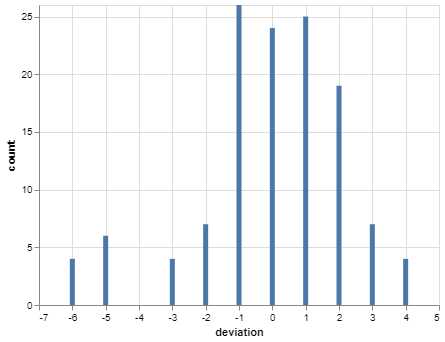

In [169]:
alt.Chart(deviation_df).mark_bar().encode(
x= 'deviation',
y= 'count')

In [175]:
total_pred_no = deviation_df['count'].sum() #126
accurate_no = deviation_df.query('deviation ==-1 |  deviation == 1| deviation ==0')['count'].sum() #75
#if we consider predictions with deviation between [-1, 1] is accurate, accuracy rate is then:
accurate_no/total_pred_no

0.5952380952380952

In [178]:
# if we consider deviations between [-2,2] is still accurate, soft accuracy rate is then:
accurate_no = deviation_df.query('deviation ==-2 | deviation ==-1 | deviation ==2| deviation == 1| deviation ==0')['count'].sum() #101
accurate_no/total_pred_no

0.8015873015873016